# Masking And Trying CNN On It

![](https://automaticaddison.com/wp-content/uploads/2019/11/fruits-table-1200x241.jpg)

In this file i tried something new for me . I have created masks for the dogs and cats images using threshold and then trained the model on it and done some predictions . 

# Importing the packages

In [1]:
import pandas as pd
import numpy as np
import cv2
import keras.models as M
import keras.layers as L
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import clear_output
import keras

# Having a look at the data

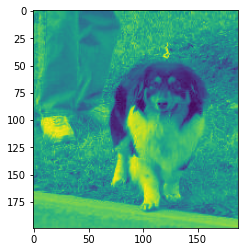

In [2]:
image=Image.open('../input/dogs-cats-images/dataset/training_set/dogs/dog.2.jpg')
image=image.convert('L')
image=np.array(image)
plt.imshow(image)

# Having a look at the histogram to get the threshold of the image 

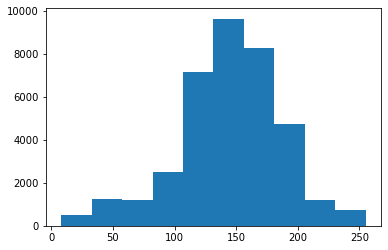

In [3]:
a,b,x=plt.hist(image.flatten())


### Threshold looks like it lies between 135-160

# Let's Make a Function to get the threshold and make masked images

In [4]:
def get_threshold(image) :
    a,b,x=plt.hist(image.flatten())
    arg=np.argmax(a)
    threshold=[b[arg],b[arg+1]]
    plt.clf()
    return threshold
def make_mask(path,color='blue',print_plot=False):
    image=Image.open(path)
    image=image.resize((150,150))
    image=image.convert('L')
    image=np.array(image)
    threshold=get_threshold(image)
    if color=='blue' :
        n=[0,0,255]
    masked_image=[]
    for i in image.flatten() :
        if i >= threshold[0] and i<=threshold[1] :
            masked_image.append(255)
        else:
            masked_image.append(0)
    masked_image=np.array(masked_image)
    masked_image=masked_image.reshape(image.shape)
    if print_plot==True :
        plt.imshow(masked_image)
    return masked_image
        
    

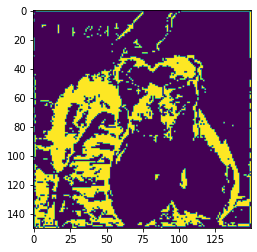

In [5]:
arr=make_mask('../input/dogs-cats-images/dataset/training_set/dogs/dog.1001.jpg',print_plot=True)

# Making Masked Data (Only 1000 for each class since it takes some time)

In [6]:
# Adding the paths
dog_path='../input/dogs-cats-images/dataset/training_set/dogs'
cats_path='../input/dogs-cats-images/dataset/training_set/cats'

In [7]:
# Making the data
X=[]
y=[]
count=0
for i in os.listdir(dog_path)[:1000]:
    print(count*100/1000)
    clear_output(wait=True)
    count+=1
    X.append(make_mask(dog_path+'/'+i))

y=[1]*1000

<Figure size 432x288 with 0 Axes>

In [8]:
# Making mask image data for cats
x2=[]
y2=[]
count=0
for i in os.listdir(cats_path)[:1000]:
    print(count*100/1000)
    clear_output(wait=True)
    count+=1
    x2.append(make_mask(cats_path+'/'+i))
y2=[0]*1000

<Figure size 432x288 with 0 Axes>

In [9]:
# Getting all the data together
X.extend(x2)
y.extend(y2)
X=np.array(X)
y=np.array(y)
X2=X/255

# Doing Train Test Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split( X2, y, test_size=0.15, random_state=42 )

# Making the model

In [14]:
model=M.Sequential()
model.add(L.Reshape((150,150,1)))
model.add(L.Conv2D(kernel_size=(3,3),filters=32,input_shape=(150,150),activation='relu'))
model.add(L.MaxPool2D(pool_size=(2,2)))
model.add(L.Conv2D(kernel_size=(3,3),filters=64,activation='relu'))
model.add(L.MaxPool2D(pool_size=(2,2)))
model.add(L.Flatten())
model.add(L.Dense(1000,activation='tanh'))
model.add(L.Dense(100,'relu'))
model.add(L.Dense(2,activation='softmax'))

# Having a look at the data

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 150, 150, 1)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 148, 148, 32)      320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 82944)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 1000)             

# Compiling the model

In [18]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Training The model

In [19]:
model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
54/54 [==============================] - 5s 28ms/step - loss: 2.9449 - accuracy: 0.5030 - val_loss: 0.7638 - val_accuracy: 0.4967
Epoch 2/20
54/54 [==============================] - 1s 22ms/step - loss: 0.7769 - accuracy: 0.5114 - val_loss: 0.7157 - val_accuracy: 0.5167
Epoch 3/20
54/54 [==============================] - 1s 22ms/step - loss: 0.6768 - accuracy: 0.5865 - val_loss: 0.6765 - val_accuracy: 0.5967
Epoch 4/20
54/54 [==============================] - 1s 22ms/step - loss: 0.4939 - accuracy: 0.7691 - val_loss: 0.7230 - val_accuracy: 0.5800
Epoch 5/20
54/54 [==============================] - 1s 24ms/step - loss: 0.1926 - accuracy: 0.9447 - val_loss: 0.9756 - val_accuracy: 0.5833
Epoch 6/20
54/54 [==============================] - 1s 23ms/step - loss: 0.0640 - accuracy: 0.9829 - val_loss: 1.1840 - val_accuracy: 0.6000
Epoch 7/20
54/54 [==============================] - 1s 22ms/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 1.3087 - val_accuracy: 0.6100
Epoch 8/20
54

# Saving the model

In [21]:
keras.models.save_model(model,'mask_model.h5')

# Making a function to do some predicitons for us

In [22]:
def make_predictions(path) :
    l=['Cats','Dogs']
    print('The masked image is :')
    arr=make_mask(path,print_plot=True)
    arr=np.array(arr)
    arr=arr.reshape(1,150,150)
    clas=np.argmax(model.predict(arr),axis=-1)
    print(l[clas[0]])
    

# Doing some predictions

The masked image is :
Dogs


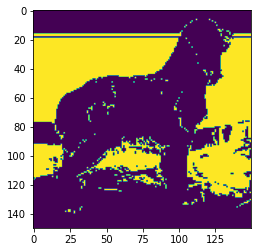

In [23]:

make_predictions('../input/dogs-cats-images/dataset/test_set/dogs/dog.4005.jpg')

The masked image is :
Cats


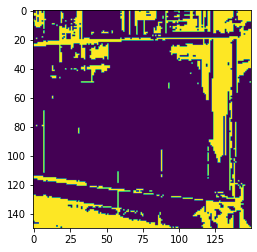

In [24]:
make_predictions('../input/dogs-cats-images/dataset/test_set/cats/cat.4008.jpg')

# I can't understand the second image at all but our model predicted it right :)

# Thank you :)